## Dataset 1 general information
1. Country: Number of countries in th dataset
2. Year: Number of years
3. Adult mortality rate (probability of dying between 15 and 60 years per 1000 population): For both male and female
4. Adult mortality rate (probability of dying between 15 and 60 years per 1000 population): Male
5. Adult mortality rate (probability of dying between 15 and 60 years per 1000 population): Female
> All the information is about people who are between 15 and 60 years of age

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings 
filterwarnings("ignore")

In [2]:
data_adult = pd.read_csv("Datasets/Adult mortality.csv")
data_adult.head()

,Unnamed: 0,Unnamed: 1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2
0,Country,Year,Both sexes,Male,Female
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215


## Renaming the columns

In [3]:
data_adult.rename(columns={'Unnamed: 0':'Country', "Unnamed: 1":"Year"}, inplace=True)

In [4]:
data_adult.rename(columns =
                  {
                      "Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)":"Both genders",
                      "Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1":"Male",
                      "Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2":"Female",

                  },inplace = True)

## Removing the first row of the dataset

In [5]:
data_adult = data_adult.iloc[1: , :]
data_adult.head()

,Country,Year,Both genders,Male,Female
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215
5,Afghanistan,2012,242,262,221


In [6]:
data_adult.tail()

,Country,Year,Both genders,Male,Female
3107,Zimbabwe,2004,694,725,670
3108,Zimbabwe,2003,697,728,671
3109,Zimbabwe,2002,695,728,667
3110,Zimbabwe,2001,688,723,656
3111,Zimbabwe,2000,675,715,640


In [7]:
data_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 1 to 3111
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       3111 non-null   object
 1   Year          3111 non-null   object
 2   Both genders  3111 non-null   object
 3   Male          3111 non-null   object
 4   Female        3111 non-null   object
dtypes: object(5)
memory usage: 121.7+ KB


In [8]:
data_adult.shape

(3111, 5)

In [9]:
data_adult.columns

Index(['Country', 'Year', 'Both genders', 'Male', 'Female'], dtype='object')

## Column data type conversions to integers

In [10]:
data_adult['Year'] = data_adult['Year'].astype("int64")
data_adult['Both genders'] = data_adult['Both genders'].astype("int64")
data_adult['Male'] = data_adult['Male'].astype("int64")
data_adult['Female'] = data_adult['Female'].astype("int64")

In [11]:
data_adult.dtypes

Country         object
Year             int64
Both genders     int64
Male             int64
Female           int64
dtype: object

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Both genders'}>],
       [<AxesSubplot:title={'center':'Male'}>,
        <AxesSubplot:title={'center':'Female'}>]], dtype=object)

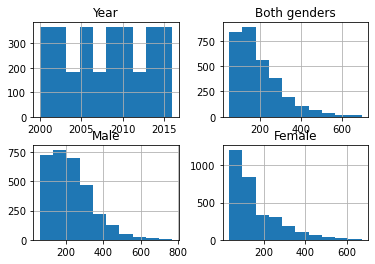

In [12]:
data_adult.hist()

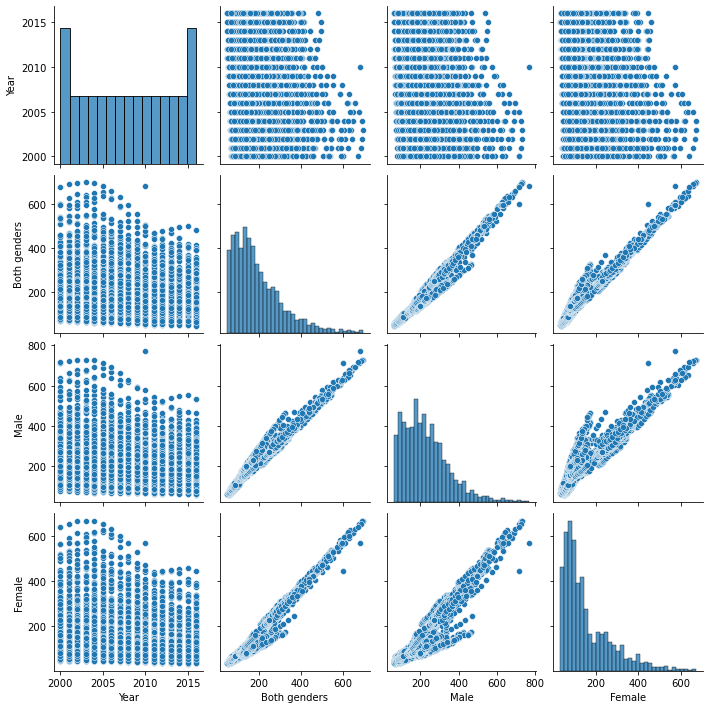

In [13]:
sns.pairplot(data_adult)

In [14]:
data_adult.nunique()

Country         183
Year             17
Both genders    476
Male            492
Female          461
dtype: int64

<AxesSubplot:>

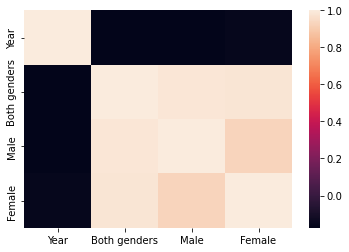

In [15]:
correlation = data_adult.corr()
sns.heatmap(correlation)

In [16]:
from pandas_profiling import ProfileReport

In [17]:
mortality_report_adults = ProfileReport(
    data_adult,
    title="Adult Morality EDA report"         
)
mortality_report_adults.to_notebook_iframe()

In [19]:
data_adult.isna().sum()

Country         0
Year            0
Both genders    0
Male            0
Female          0
dtype: int64

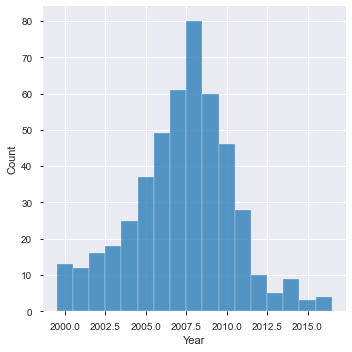

In [20]:
sns.displot(data_adult.groupby(['Both genders'])['Year'].mean(), discrete = True)

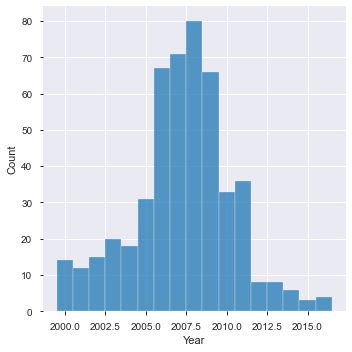

In [21]:
sns.displot(data_adult.groupby(['Male'])['Year'].mean(), discrete = True)

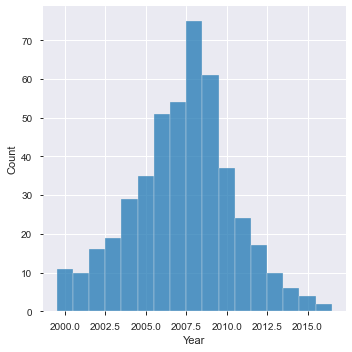

In [22]:
sns.displot(data_adult.groupby(['Female'])['Year'].mean(), discrete = True)

In [23]:
sns.set_style("darkgrid")

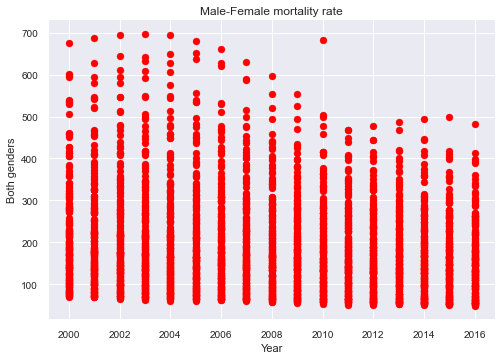

In [24]:
plt.title("Male-Female mortality rate")
plt.xlabel("Year")
plt.ylabel("Both genders")
plt.scatter(data_adult['Year'], data_adult['Both genders'], color = "red")
plt.show()

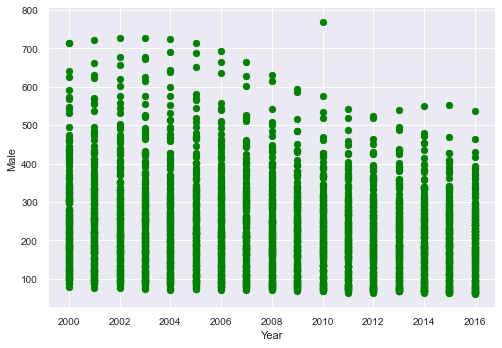

In [25]:
plt.xlabel("Year")
plt.ylabel("Male")
plt.scatter(data_adult['Year'], data_adult['Male'], color = "green")
plt.show()

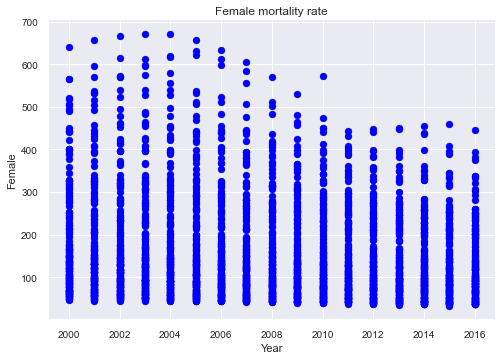

In [26]:
plt.title("Female mortality rate")
plt.xlabel("Year")
plt.ylabel("Female")
plt.scatter(data_adult['Year'], data_adult['Female'], color = "blue")

In [27]:
categorical = [col for col in data_adult.columns if data_adult[col].dtype == 'O']

In [28]:
categorical

['Country']

In [29]:
countries = data_adult[categorical]

In [30]:
countries

,Country
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
...,...
3107,Zimbabwe
3108,Zimbabwe
3109,Zimbabwe
3110,Zimbabwe


In [31]:
country_data = pd.get_dummies(countries, drop_first = True)

In [32]:
country_data

,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
data_adult.drop('Country', axis = 1, inplace = True)

In [34]:
data_adult.head()

,Year,Both genders,Male,Female
1,2016,245,272,216
2,2015,233,254,210
3,2014,234,254,213
4,2013,235,254,215
5,2012,242,262,221


In [35]:
df_list = [country_data, data_adult]

In [36]:
new_data = pd.concat(df_list, axis = 1)
new_data

,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,...,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Year,Both genders,Male,Female
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016,245,272,216
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,233,254,210
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2014,234,254,213
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2013,235,254,215
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2012,242,262,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2004,694,725,670
3108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2003,697,728,671
3109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2002,695,728,667
3110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2001,688,723,656


In [37]:
data_adult.drop('Both genders', axis = 1)
data_adult.drop('Male', axis = 1)
data_adult.drop('Female', axis = 1)

,Year,Both genders,Male
1,2016,245,272
2,2015,233,254
3,2014,234,254
4,2013,235,254
5,2012,242,262
...,...,...,...
3107,2004,694,725
3108,2003,697,728
3109,2002,695,728
3110,2001,688,723


In [38]:
y1 = data_adult['Both genders']
y2 = data_adult['Male']
y3 = data_adult['Female']

In [39]:
new_data.drop('Both genders', axis = 1, inplace = True)
new_data.drop('Male', axis = 1, inplace = True)
new_data.drop('Female', axis = 1, inplace = True)

In [40]:
x = new_data

In [41]:
from sklearn.model_selection import train_test_split

## Applicaton of ML algorithms for both genders

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size = 0.2)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn import metrics
import pickle

In [46]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_1.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.9448639386030702
predictions are: 
 [211.19630297 223.20544607  58.93892925 117.76738672 106.61574241
 284.58929645 182.70766242 134.11377474 319.84126412 113.85468545
 100.19840619  98.97503175 264.17087639 176.63057394  59.18984434
 124.14400728 165.99694508  79.01758249  79.50577331  51.28568853
 276.75150666 120.75924257 244.82087926 105.7393147  256.365653
 231.3651027  539.72222376 134.37194985 179.57423953 178.15447933
  69.23013606 190.78240908 248.75946056 322.8613955  163.77383099
 153.01022248 207.7925121  176.93321417 124.86872146 135.90636867
 191.6230173  138.81518007  64.73225987 267.49877526 312.08671078
 100.81019687  32.20802434  46.27627448 120.25556357  72.80949727
 468.69412401 200.0634925  128.74262711 104.28116524  43.36145703
 160.43577811 465.15874513 203.36112113 383.671318    94.98676199
  92.98479432  94.15532839  62.85163052 233.70577557  58.44442441
 110.88976341  41.79179838 236.37239569 202.58017905 154.64530069
 108.66910691 311.96581

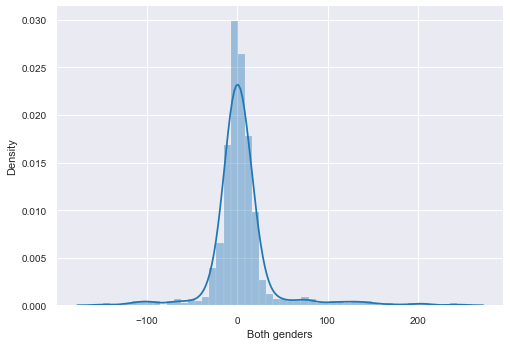

In [47]:
predict(LinearRegression(), 1)

## Application of ML algorithm for Male mortality rate

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size = 0.2)

In [50]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_2.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.9416175821498495
predictions are: 
 [147.39352982 151.60271769  57.61304157 201.96733672 241.90337483
 211.04756088 609.96079845 224.67377913  74.6885552  216.19817033
 237.75609403 233.80764658 580.78658378 152.48920932 428.74667036
 366.17235925 416.03325716 159.31951034  55.95450631 142.3494335
 285.3902396  169.32098951 296.75783863 267.38746876 184.05581757
 110.74520957 200.9893313  211.41594237 255.84052813 407.55764836
 266.41182246 231.14540154 467.24812224 374.26773727 116.94146635
  70.32645477 105.87336093 248.30183228  58.18231932 555.35975739
 412.85553206 157.60914572 279.03875968 322.79737144 119.46890612
 159.80815911 110.32316706  94.20782764 296.52787566 270.72408844
 109.99816772 111.0459635  343.98639344 141.3551797  145.5929841
 252.26607156  65.36867182  99.84908517 126.94294552 156.16585493
 593.49999698 349.5731687  259.87935837 103.34240437 242.09312291
  87.32692459 120.1661577  182.95399378  46.45819212  74.21298255
 416.01109048 304.36097

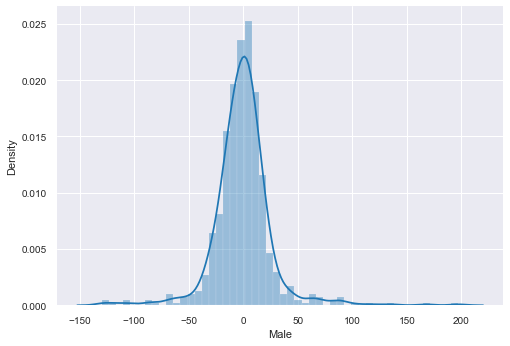

In [52]:
predict(LinearRegression(), 1)

Training score : 1.0
predictions are: 
 [161 162  71 203 199 210 723 215  75 215 223 225 643 125 496 366 484 152
  74 124 270 145 298 242 196 107 172 219 255 467 262 230 505 417 128  76
 130 219  75 524 422 149 254 346 144 153  99 104 307 267  88 103 351 135
 163 246  74 101 132 159 568 327 271 125 299  84 111 189  70  92 428 311
 143 196 144 180  74 193 284 320  94 186 195 273 193 288 217 157 159 230
 468 164 174 362 166 316 225 238 231  95 475 159 166 320 208  78 397 255
 435 308 369 153 302 112  79  77 186 171 339 160 118 313 147 198 163 292
 381  68 392 274 261 101 243 275 178  80 265 133 260 251 485 168 126 117
 260 186 118 364 198 312  81 145  88 630 149 495 246 103 287 231 476 363
 226 276 175  96 434 246 138 372 253 142 205 189  67  81 203 311 124 203
 678  73  88 256 164 122 142 226 136 238 201 108 284 327 287 306  81 280
 211 238 170 107 299 520 116 344 108 168 290 122 364  68 238 328 150 194
 306 162 140 125 182 183 296 429  82 120  76 168 234 269 165 152 185 153
 322 125 11

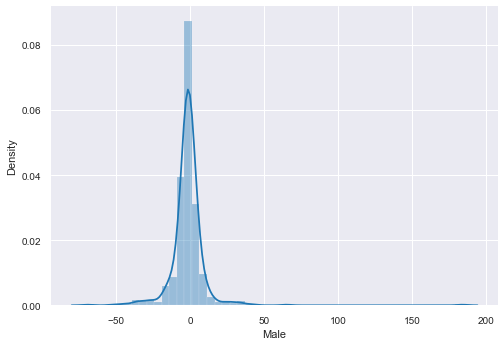

In [53]:
predict(RandomForestClassifier(), 0)

Training score : 1.0
predictions are: 
 [158 162  71 158 199 210 723 215  75 215 223 225 637 125 496 366 484 152
  74 124 270 145 298 340 196 107 172 219 255 467 158 230 505 363 254  76
 130 212  75 524 422 149 254 320 144 153  99 104 297 254  88 103 351 135
 163 246  74 101 132 268 568 327 271 125 299 268 122 189  70  92 428 349
 137 196 144 180 158 262 284 320  94 186 186 265 193 264 217 157 268 230
 468 164 174 158 179 316 225 238 275  95 475 275 166 320 208  78 397 255
 435 308 275 153 275 112  79  77 158 300 339 160 118 254 147 198 163 179
 163  68 467 274 261 268 236 158 178  80 254 268 260 249 179 168 126 117
 260 254 118 324 198 312  81 119  88 630 149 495 246 103 275 163 476 363
 226 263 179  96 434 246 138 351 253 138 205 189  67 268 203 311 124 203
 678  73  88 256 164 122 142 226 136 275 201 296 284 327 295 306  81 231
 203 238 170 107 281 520 116 344 179 168 158 122 294  68 238 328 146 296
 306 162 140 125 182 183 296 429 262 120  76 168 234 269 165 152 185 153
 158 125 30

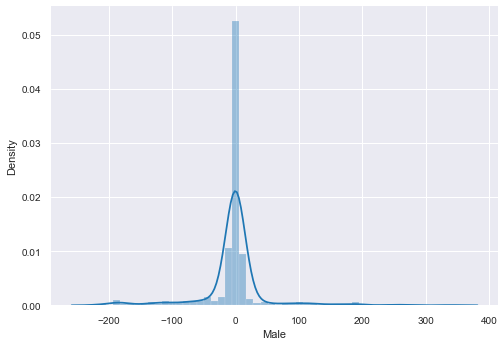

In [54]:
predict(DecisionTreeClassifier(), 0)

## Application of ML algorithms for Femal mortality rate

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y3, test_size = 0.2)

In [61]:
def predict(ml_model, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    
    r2_score = metrics.r2_score(y_test,y_prediction)
    
    print('r2 score: {}'.format(r2_score))
    print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_prediction))
    print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_prediction))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file = open("model_3.pkl",'wb')
        pickle.dump(model,file)
    

Training score : 0.9439567205296135
predictions are: 
 [123.54016777 103.76965891 185.81208535 185.16381577  61.7069375
  81.85922014  94.06578769 239.33927977  76.17277009  34.25776944
  56.25893887  72.2376305   59.22020043 124.98226377 105.68751316
 337.38594007 119.43406435  15.68513392  84.28632932 239.28353897
  98.81276547 308.46137875 117.33425882  93.67190904 115.84215352
 152.41387501  94.21367068 101.5826408  152.31673429  60.0769429
  94.53442986 172.66046198  93.80654876  85.08088016  56.31434597
  63.44934748  31.36809789 243.44398855  78.73353752 111.39397507
  59.70980766 194.94079334  68.43860535  88.87203639 225.81148522
 259.77803942 116.76475565  52.69822638  93.36169783  77.01143545
 404.5532087  273.30367035  96.63654203  48.73028803 224.45565942
 142.40316826 167.36529405 469.66689094 208.08367188  91.71524081
  48.61846725  12.92130659 136.83369378  75.69360571 262.82326562
 146.65923363 355.16415218 401.48705407  86.78188478 149.75087183
  92.45959668 171.29015

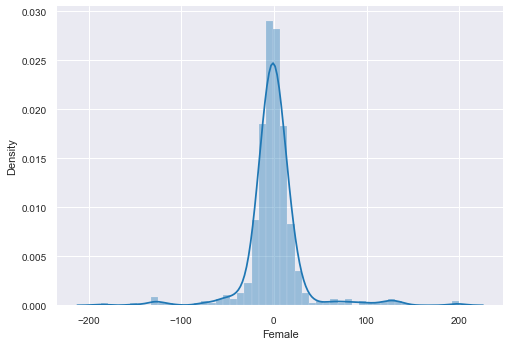

In [62]:
predict(LinearRegression(), 1)

Training score : 1.0
predictions are: 
 [139  92 283 263  52  86  91 240  77  49  74  64  52 125  91 350 134  36
  78 229 100 275 130 250 105 147  87  99 165  53 124 167  92  92  74  50
  44 225  66 113  80 192  54 103 238 234 127  53  92  58 399 292 106  54
 263 135 161 440 263  97  68  42 275  67 236 149 352 304  74 283  96 186
  93 131 263 111 264 165 129 100 113 122 192  82 127 323 232 101 139 397
  55  55 224 111 313 126 250  89 242  93  86 530  59 190 146  66 275  93
 118  53  93  71  96 228 280 110 263 205  60  76 109  65 237 599 364  71
 122  73 214 137 164 200  95  53 273 193 166 149 164 325 192 113 217 393
 113 115  38  70 101 190 127 263 364 307 290  69 275 105 159 309 257  71
 347  69 263  41 111 201 109 190  59 188 153 164 121  66 139  40  99  48
 445  48 233  81 528  85 283  62  86 198 126 190 224  62 210 156  51  89
 275  60 263 263 121 290  71 263  40 226  65 105 228  99 258 126 148 109
 139  92 439  98 277 283 140  71  80 263 322 238 125 311  44  88  64 116
 269  65  8

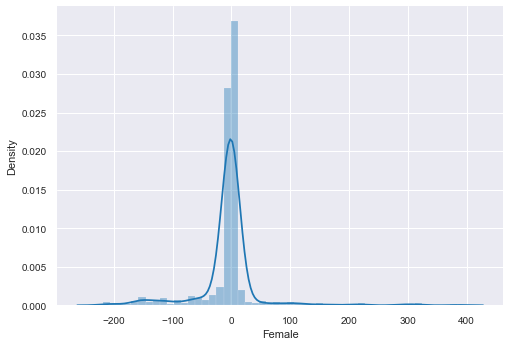

In [59]:
predict(DecisionTreeClassifier(), 0)

Training score : 1.0
predictions are: 
 [139  92 166 192  52  86  91 246  77  49  74  64  52 125  91 350 134  36
  78 229 100 319 130 101 105 147  87  99 165  53 124 167  92  92  74  50
  44 225  66 113  80 192  54 103 238 234 127  53  92  58 399 292 106  54
 236 135 161 440 220 100  68  42 131  67 236 154 352 304  74 149  96 186
  93 131 115 118 264 175 213 103 113 122 192  82 127 323 232 101 139 397
  55  55 224 171 313 126 250  89 242  93  86 530  59 166 146  66  81  97
 118  53  93  71  96 228 280 110 171 205  60  76 109  65 237 599 364  71
 122  73 214 137 164 200  95  53 273 193 166 149 164 325 192 113 217 393
 113 115  38  70 101 150 127 365 365 307 121  69 161 105 159 309 257  71
 347  69 369  41 120 223 109 239  59 188 153 164 121  66 139  40  99  48
 445  48 111  81 528  85  66  62  86 198 126 127 224  62 210 156  51  89
 140  60 124  96 121 131  71 139  40 226  65 105 228  99 258 126 148 109
 139  92 439  98 277 128 140  71  80 281 322 111 125 311  44  88  64 116
 269  65  8

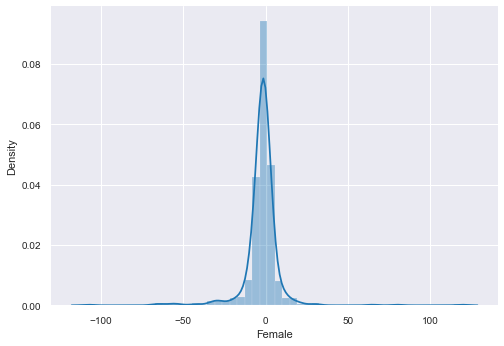

In [60]:
predict(RandomForestClassifier(), 0)

## Conclusion:
### Thus while implementing the model, we have derieved the following insights:
#### 1. The Linear Regression model's evaluation metrics are <u>very much irrelevant</u> as compared to other models.
#### 2. The RandomForestRegressor is the best fit model as the <u>*evaluation metrics and training score is excellent.*</u>
#### 3. Distribution plot also derieves the stability of the model. 
#### 4. From the predictions we can conclude that in the upcoming years the mortality rates of both the genders will reduce to a greater extent